In [1]:
import numpy as np
import pandas as pd
import adafdr.method as md
import adafdr.data_loader as dl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Microbiome: enigma_ph

In [2]:
data_path = '/data3/martin/AdaFDRpaper_data'
file_path = data_path + '/microbiome/microbiome_enigma_ph'
df_data = pd.read_csv(file_path, sep=',')
p = df_data['p_val'].as_matrix()
x = df_data[['ubiquity', 'mean_abun']].as_matrix()
print('p:', p.shape)
print('x:', x.shape)

p: (4007,)
x: (4007, 2)


## covariate visualization

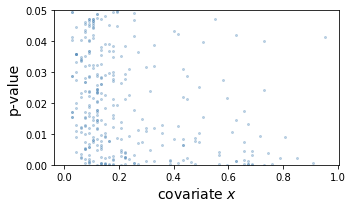

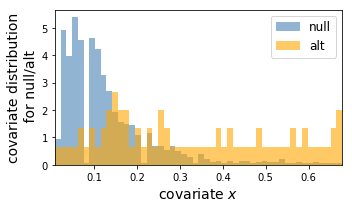

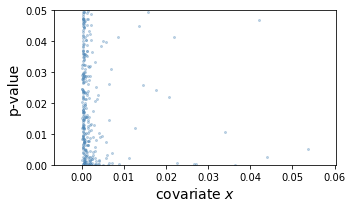

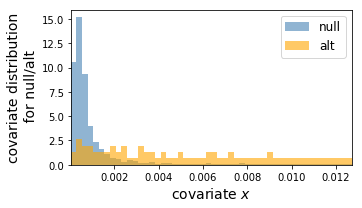

In [3]:
md.adafdr_explore(p, x, output_folder=None)

## hypothesis testing

In [4]:
# Baseline methods: BH, SBH
alpha = 0.2
n_rej, t_rej = md.bh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for BH: %d'%n_rej)
n_rej, t_rej, pi0_hat = md.sbh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for SBH: %d'%n_rej)
res = md.adafdr_test(p, x, alpha=alpha, fast_mode=True, single_core=False)
n_rej = res['n_rej']
t_rej = res['threshold']
print('# number of discoveries for adafdr: %d'%np.sum(p<=t_rej))

# number of discoveries for BH: 61
# number of discoveries for SBH: 65
# number of discoveries for adafdr: 124


In [5]:
%%bash -s "$file_path" "$alpha"
Rscript analysis_single.R $1 $2

[1] "data_path: /data3/martin/AdaFDRpaper_data/microbiome/microbiome_enigma_ph"
[1] "alpha: 0.2"
[1] "Loading the data"
alpha = 0.92: FDPhat 0.9199, Number of Rej. 1861
alpha = 0.91: FDPhat 0.9097, Number of Rej. 1695
alpha = 0.9: FDPhat 0.8996, Number of Rej. 1654
alpha = 0.89: FDPhat 0.8897, Number of Rej. 1551
alpha = 0.88: FDPhat 0.8797, Number of Rej. 1438
alpha = 0.87: FDPhat 0.8697, Number of Rej. 1412
alpha = 0.86: FDPhat 0.8597, Number of Rej. 1376
alpha = 0.85: FDPhat 0.8498, Number of Rej. 1318
alpha = 0.84: FDPhat 0.84, Number of Rej. 1200
alpha = 0.83: FDPhat 0.8295, Number of Rej. 1097
alpha = 0.82: FDPhat 0.8199, Number of Rej. 1027
alpha = 0.81: FDPhat 0.8091, Number of Rej. 964
alpha = 0.8: FDPhat 0.8, Number of Rej. 835
alpha = 0.79: FDPhat 0.7899, Number of Rej. 814
alpha = 0.78: FDPhat 0.7787, Number of Rej. 741
alpha = 0.77: FDPhat 0.77, Number of Rej. 726
alpha = 0.76: FDPhat 0.7597, Number of Rej. 720
alpha = 0.75: FDPhat 0.7497, Number of Rej. 715
alpha = 0.74: 

Loading required package: nlme
This is mgcv 1.8-24. For overview type 'help("mgcv-package")'.
We recommend that you supply (many) more than 1000 p-values for meaningful data-driven hypothesis weighting results.
